# Hand written recognition System

### Importing Necessary Libraries

In [1]:
import numpy #used for numerical analysis
import tensorflow #open source used for both ML and DL for computation
from tensorflow.keras.datasets import mnist #mnist dataser
from tensorflow.keras.models import Sequential #it is a plain stack of layers
from tensorflow.keras import layers #A layer consists of a tensor-in tensor-out computation function
from tensorflow.keras.layers import Dense, Flatten #Dense-Dense layer is the regular deeply connected neural network layer
#Faltten-used fot flattening the input or change the dimension
from tensorflow.keras.layers import Conv2D #Convolutional layer
from keras.optimizers import Adam #optimizer
from keras.utils import np_utils #used for one-hot encoding

# load data


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() #splitting the mnist data into train and test

In [3]:
print(X_train.shape)#shape is used for give the dimension values #60000-rows 28x28-pixels 
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


### Understanding the data

In [4]:
X_train[0]#printing the first image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
y_train[0]#printing lable of first image

5

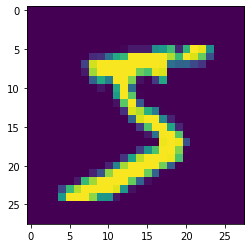

In [6]:
import matplotlib.pyplot as plt #used for data visualization
plt.imshow(X_train[0]) #ploting the index=0 image

### Reshaping Dataset

In [7]:
# Reshaping to format which CNN expects (batch, height, width, channels)
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')

### One-Hot Encoding

In [8]:
# one hot encode
number_of_classes = 10 #storing the no. classes in a variable
y_train = np_utils.to_categorical(y_train, number_of_classes) #converts the output in binary format
y_test = np_utils.to_categorical(y_test, number_of_classes)

In [9]:
y_train[0] #printing the new label

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### Creating the Model

In [10]:
# create model
model = Sequential() 
# adding model layer
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
#model.add(Conv2D(32, (3, 3), activation='relu'))
#flatten the dimension of the image
model.add(Flatten())
#output layer with 10 neurons
model.add(Dense(number_of_classes, activation='softmax'))

### Compiling the model

In [11]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

### Fitting the model

In [12]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 184s 98ms/step - loss: 0.2451 - accuracy: 0.9497 - val_loss: 0.0966 - val_accuracy: 0.9715
Epoch 2/5
1875/1875 [==============================] - 183s 98ms/step - loss: 0.0694 - accuracy: 0.9785 - val_loss: 0.0971 - val_accuracy: 0.9714
Epoch 3/5
1875/1875 [==============================] - 183s 98ms/step - loss: 0.0487 - accuracy: 0.9850 - val_loss: 0.0829 - val_accuracy: 0.9782
Epoch 4/5
1875/1875 [==============================] - 177s 94ms/step - loss: 0.0382 - accuracy: 0.9877 - val_loss: 0.0881 - val_accuracy: 0.9769
Epoch 5/5
1875/1875 [==============================] - 171s 91ms/step - loss: 0.0277 - accuracy: 0.9910 - val_loss: 0.1097 - val_accuracy: 0.9753


### Observing the metrics

In [13]:
# Final evaluation of the model
metrics = model.evaluate(X_test, y_test, verbose=0)
print("Metrics(Test loss & Test Accuracy): ")
print(metrics)

Metrics(Test loss & Test Accuracy): 
[0.1097492054104805, 0.9753000140190125]


### Predicting the output 

In [14]:
prediction=model.predict(X_test[:4])
print(prediction)

[[5.50544734e-15 7.41999492e-20 5.00876077e-12 1.26642463e-09
  3.52252804e-21 1.54133163e-17 3.15550259e-21 1.00000000e+00
  1.32678888e-13 6.44072333e-14]
 [1.51885260e-08 8.02883537e-09 1.00000000e+00 6.44802788e-13
  6.37117113e-16 3.40490114e-15 2.15804121e-08 2.18907611e-19
  3.38496564e-10 2.07915498e-20]
 [3.14093924e-08 9.99941349e-01 2.01593957e-06 1.45100779e-10
  5.25237965e-06 1.59223120e-07 3.15299786e-08 1.53995302e-07
  5.09846941e-05 1.14552066e-07]
 [1.00000000e+00 1.35018288e-14 2.28308122e-10 1.79766094e-16
  1.28767550e-14 7.12401882e-12 2.92727509e-11 3.52439052e-13
  2.56207252e-12 2.32345068e-12]]


In [15]:
import numpy as np
print(np.argmax(prediction,axis=1)) #printing our labels from first 4 images
print(y_test[:4]) #printing the actual labels

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Taking images as input and checking results

In [18]:
# Importing the Keras libraries and packages
from tensorflow.keras.models import load_model
model = load_model(r'C:/Users/DELL/Hand written recognition System/models/mnistCNN.h5')
from PIL import Image#used for manipulating image uploaded by the user.
import numpy as np#used for numerical analysis
for index in range(4):
    img = Image.open('data/' + str(index) + '.png').convert("L")# convert image to monochrome
    img = img.resize((28,28))# resizing of input image
    im2arr = np.array(img) #converting to image
    im2arr = im2arr.reshape(1,28,28,1) #reshaping according to our requirement
    # Predicting the Test set results
    y_pred = model.predict(im2arr) #predicting the results
    print(y_pred)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


### Saving the model

In [19]:
# Save the model
model.save('models/mnistCNN.h5')